# Исследование объявлений о продаже квартир

Датасет представляет собой архив объявлений о продаже квартир в Санкт-Петербурге и Ленинградской областти за несколько лет. Необходимо определить параметры, влияющие на рыночную стоимость объектов недвижимости.

Описание исходных данных:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении.

## 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5058,7,5600000.0,60.0,2018-02-01T00:00:00,2,3.2,4.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,31263.0,6563.0,2.0,387.0,3.0,260.0,18.0
5823,18,4200000.0,57.3,2017-08-29T00:00:00,2,2.7,9.0,30.0,1,NaN,...,10.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,451.0
2428,6,2500000.0,45.3,2017-07-16T00:00:00,2,2.7,9.0,27.7,2,NaN,...,7.0,1.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,352.0
22347,6,12500000.0,121.0,2017-08-09T00:00:00,3,3.0,3.0,57.0,3,NaN,...,11.0,NaN,Санкт-Петербург,20441.0,2275.0,2.0,502.0,3.0,295.0,163.0
10221,5,7000000.0,57.0,2016-05-30T00:00:00,2,2.5,10.0,35.0,3,NaN,...,13.0,2.0,Санкт-Петербург,48727.0,16655.0,0.0,NaN,0.0,NaN,594.0


<b>Проверим пропуски в данных.</b>

In [5]:
round((df.isnull().sum().sort_values() / df.shape[0] * 100), 0)

total_images             0.0
open_plan                0.0
floor                    0.0
rooms                    0.0
studio                   0.0
total_area               0.0
last_price               0.0
first_day_exposition     0.0
locality_name            0.0
floors_total             0.0
living_area              8.0
kitchen_area            10.0
days_exposition         13.0
ponds_around3000        23.0
parks_around3000        23.0
cityCenters_nearest     23.0
airports_nearest        23.0
ceiling_height          39.0
balcony                 49.0
ponds_nearest           62.0
parks_nearest           66.0
is_apartment            88.0
dtype: float64

Пропущенные значения имеются в следующих колонках:
* `kitchen_area`
* `days_exposition`
* `parks_around3000_count`
* `ponds_around3000_count`
* `city_center_distance`
* `airports_distance`
* `airports_distance`
* `ceiling_height`
* `has_balcony`
* `ponds_nearest_distance`
* `park_distance`
* `is_apartment`.

<b>Проверим датасет на наличие явных дубликатов строк.</b>

In [6]:
df.duplicated().sum()

0

Явных дубликатов строк датасета не обнаружено.

<b>Проверим значения колонки `locality_name`</b>

Датасет содержит 22 колонки и 23 699 строк.

* В большинстве колонок имеются пропущенные данные.
* Названия некоторых столбцов лучше изменить; например, `cityCenters_nearest` стоит привести к snake_case для достижения единого формата.
* 2 колонки имеют булевые значения.
* Около половины столбцов датасета содержат пропущенные значения.
* Дублирующихся строк не выявлено.

Наличие пропусков может носить разную природу, в зависимости от конкретной колонки. Например, для `balcony` это означает, что балкона/лоджии в квартире нет и этот пропуск нормален; `days_exposition` - что объект размещен сегодня и т.д. Другие пропуски могут действительно свидетельствовать об отсутсвии информации: `park_nearest` - у владельца может не быть информации или в населенном пункте нет парков, аналогичная ситуация со столбцом `airports_nearest`.

Обзор каждой колонки осуществляется в следующем разделе исследования с параллельным исправлением найденных ошибок.

## 2. Предобработка данных

### 2.1. Обработка ошибок

#### 2.1.1 Переименование столбцов и изменение их порядка

In [7]:
# Переименуем несколько столбцов:
# rooms => rooms_count,
# studio => is_studio,
# open_plan => has_open_plan,
# balcony => has_balcony,
# airports_nearest => airports_distance,
# cityCenters_nearest => city_center_distance,
# parks_around3000 => parks_around3000_count,
# parks_nearest => park_distance,
# ponds_around3000 => ponds_around3000_count,
# ponds_nearest => ponds_nearest_distance

df = df.rename(columns = {
    'rooms': 'rooms_count',
    'studio': 'is_studio',
    'open_plan': 'has_open_plan',
    'balcony': 'has_balcony',
    'airports_nearest': 'airports_distance',
    'cityCenters_nearest': 'city_center_distance',
    'parks_around3000': 'parks_around3000_count',
    'parks_nearest': 'park_distance',
    'ponds_around3000': 'ponds_around3000_count',
    'ponds_nearest': 'ponds_nearest_distance'
})

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms_count', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'has_open_plan', 'kitchen_area',
       'has_balcony', 'locality_name', 'airports_distance',
       'city_center_distance', 'parks_around3000_count', 'park_distance',
       'ponds_around3000_count', 'ponds_nearest_distance', 'days_exposition'],
      dtype='object')

In [8]:
# Поскольку столбцы расположены нелогично, целесообразно изменить их порядок.

df = df[['locality_name',
        'total_area',
        'living_area',
        'kitchen_area',
        'ceiling_height',
        'rooms_count',
        'floor',
        'floors_total',
        'has_balcony',
        'is_apartment',
        'is_studio',
        'city_center_distance',
        'airports_distance',
        'park_distance',
        'parks_around3000_count',
        'ponds_nearest_distance',
        'ponds_around3000_count',
        'last_price',
        'total_images',
        'has_open_plan',
        'first_day_exposition',
        'days_exposition']]

df.columns

Index(['locality_name', 'total_area', 'living_area', 'kitchen_area',
       'ceiling_height', 'rooms_count', 'floor', 'floors_total', 'has_balcony',
       'is_apartment', 'is_studio', 'city_center_distance',
       'airports_distance', 'park_distance', 'parks_around3000_count',
       'ponds_nearest_distance', 'ponds_around3000_count', 'last_price',
       'total_images', 'has_open_plan', 'first_day_exposition',
       'days_exposition'],
      dtype='object')

#### 2.1.2 Колонка `locality_name`

In [9]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Очень широкий разброс значений столбца `locality_name`, они будут структурированы на дальших этапах исследования.

#### 2.1.3 Колонка `rooms_count`

In [10]:
df['rooms_count'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms_count, dtype: int64

Подозрительные значения строк с более 10 комнатами (допуская, что 6-10 комнат все же встречаются). Также заменим значения с числом комнат равным 0, заменим им на 1.

In [11]:
df['rooms_count'] = df['rooms_count'].replace(0, 1)

#### 2.1.4 Колонка `floor`

In [12]:
(df['floor'].value_counts() / len(df['floor']) * 100).round(2)

2     14.21
3     12.97
1     12.31
4     11.83
5     11.06
6      5.51
7      5.14
8      4.57
9      4.43
10     2.90
12     2.22
11     2.21
13     1.60
15     1.45
14     1.42
16     1.33
17     0.96
18     0.75
19     0.62
21     0.53
22     0.48
20     0.46
23     0.42
24     0.27
25     0.19
26     0.10
27     0.04
28     0.00
33     0.00
29     0.00
30     0.00
32     0.00
31     0.00
Name: floor, dtype: float64

2/3 объектов находятся между 1 и 5 этажами включительно. Проблем с данными не обнаружено.

#### 2.1.5. Колонка `total_area`

In [13]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

8% значений в столбце `total_area` пропущенны.
<br>Максимальное знаечние выглядит подозрительно, но остальные показатели дискриптивной статистики выглядят правдоподобно.

#### 2.1.6 Колонка `living_area`

In [14]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [15]:
df['living_area'].isnull().sum()

1903

Значения 1 903 строк пропущены.
Проверим, с чем наиболее коррелируют значения `living_area`, чтобы подобрать адекватный фактор для выбора замены.

In [16]:
df.corr()

,total_area,living_area,kitchen_area,ceiling_height,rooms_count,floor,floors_total,has_balcony,is_studio,city_center_distance,airports_distance,park_distance,parks_around3000_count,ponds_nearest_distance,ponds_around3000_count,last_price,total_images,has_open_plan,days_exposition
total_area,1.000000,0.939537,0.609121,0.095490,0.760233,-0.024754,-0.075774,0.047937,-0.072653,-0.231446,-0.030753,-0.021497,0.164689,-0.097969,0.162346,0.653675,0.115352,-0.034885,0.149675
living_area,0.939537,1.000000,0.428674,0.090650,0.850172,-0.097210,-0.169311,0.018849,-0.056231,-0.231368,-0.057912,-0.050167,0.184453,-0.081674,0.148933,0.566492,0.104780,-0.033711,0.142454
kitchen_area,0.609121,0.428674,1.000000,0.087641,0.269945,0.135531,0.163944,0.098634,NaN,-0.190049,0.008200,0.029641,0.087503,-0.105223,0.150148,0.519869,0.104756,NaN,0.100586
ceiling_height,0.095490,0.090650,0.087641,1.000000,0.056248,-0.011798,-0.028732,0.040523,0.001674,-0.091689,-0.023947,-0.019167,0.065915,-0.059090,0.078209,0.085430,-0.001987,0.042777,0.019091
rooms_count,0.760233,0.850172,0.269945,0.056248,1.000000,-0.148302,-0.223530,0.022322,-0.080495,-0.186991,-0.063702,-0.053879,0.136145,-0.058041,0.093808,0.365209,0.097569,-0.044939,0.125752
floor,-0.024754,-0.097210,0.135531,-0.011798,-0.148302,1.000000,0.678059,0.168773,0.036940,0.009084,0.071597,0.073045,-0.163784,0.024850,-0.076312,0.026576,0.031340,0.035824,-0.039463
floors_total,-0.075774,-0.169311,0.163944,-0.028732,-0.223530,0.678059,1.000000,0.194065,0.070151,0.019774,0.108288,0.097527,-0.252833,0.038864,-0.122735,-0.006984,0.010427,0.050791,-0.052234
has_balcony,0.047937,0.018849,0.098634,0.040523,0.022322,0.168773,0.194065,1.000000,0.031455,0.051051,0.066834,0.052328,-0.082850,0.010847,-0.032709,0.029646,0.121693,0.019491,-0.032909
is_studio,-0.072653,-0.056231,NaN,0.001674,-0.080495,0.036940,0.070151,0.031455,1.000000,-0.007029,-0.021876,0.009134,-0.030202,0.002606,0.000939,-0.025362,-0.029303,-0.004235,-0.022476
city_center_distance,-0.231446,-0.231368,-0.190049,-0.091689,-0.186991,0.009084,0.019774,0.051051,-0.007029,1.000000,0.272184,-0.040650,-0.161738,0.028903,-0.074577,-0.206747,-0.047666,-0.004204,-0.060714


Сильная корреляция у `living_area` наблюдается со столбцом `rooms_count` (0.85).
<br>Заменим пропущенные значения медианными площадями `living_area`, в зависимости от числа комнат объекта.

In [17]:
for item in df['rooms_count'].unique():
    filtered = df['living_area'].isna() & (df['rooms_count'] == item)
    df.loc[filtered, 'living_area'] = df.loc[df['rooms_count'] == item, 'living_area'].median()
    
df['living_area'].isnull().sum()

0

#### 2.1.7 Колонка `kitchen_area`

In [18]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Значения столбца `kitchen_area` выглядят правдоподорбно. Подозрение лишь вызывает большая кухня у одного из объектов.
<br>Вставим в пропуски медианные значения плщади кухонь, расположенных в квартирах с тем же числом комнат.

In [19]:
for item in df['rooms_count'].unique():
    filtered = df['kitchen_area'].isna() & (df['rooms_count'] == item)
    df.loc[filtered, 'kitchen_area'] = df.loc[df['rooms_count'] == item, 'kitchen_area'].median()
    
df['kitchen_area'].isnull().sum()

0

#### 2.1.8 Колонка `ceiling_height`

In [20]:
df['ceiling_height'].isnull().sum() / df['ceiling_height'].count() * 100

63.396304467733046

63% строк имеют пропуски значений высоты потолка.
<br>Вставим в пропуски медианные значения высота потолка квартир, расположенных на таком же этаже.

In [21]:
for item in df['floor'].unique():
    filtered = df['ceiling_height'].isna() & (df['floor'] == item)
    df.loc[filtered, 'ceiling_height'] = df.loc[df['floor'] == item, 'ceiling_height'].median()
    
df['ceiling_height'].isnull().sum()

4

Для 4 значений, по которым не рассчиталась медиана, установим высоту 2.5 м, поскольку высота потолка в жилом помещении не может быть меньше данного значения (СНиП).
Также заменим 22 неправдоподобных значения (более 10 м) на 10 м.

In [22]:
df['ceiling_height'] = df['ceiling_height'].where(~((df['ceiling_height'].isnull()) | (df['ceiling_height'] > 10)),10)

df['ceiling_height'].isnull().sum()

0

In [23]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.705107
std          0.346306
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

#### 2.1.9 Колонка `has_balcony`

In [24]:
df['has_balcony'].value_counts(ascending=False)

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: has_balcony, dtype: int64

Аномалий не обнаружено.

#### 2.1.10  Колонка `is_studio`

In [25]:
df['is_studio'].value_counts() / len(df['is_studio']) * 100

False    99.371281
True      0.628719
Name: is_studio, dtype: float64

Аномалий не обнаружено. 99 объектов являются квартирами, а не студиями.

#### 2.1.11  Колонка `has_open_plan`

In [26]:
df['has_open_plan'].value_counts() / len(df['has_open_plan']) * 100

False    99.717288
True      0.282712
Name: has_open_plan, dtype: float64

Аномалий не обнаружено. Свободную планировку имеют менее 1% объектов.

#### 2.1.12  Колонка `first_day_exposition`

In [27]:
# Скорректируем формат даты-времени.

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
df['first_day_exposition'].dt.year.value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: first_day_exposition, dtype: int64

Выглядит корректно: большинство квартир были выставлены на продажу в 2017-2018 гг.

#### 2.1.13  Колонка `last_price`

In [28]:
# Приведем данные к целочисленному типу. 

df['last_price'] = (df['last_price']/1000000).astype('int')

df['last_price'].describe()

count    23699.000000
mean         6.053040
std         10.914448
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: last_price, dtype: float64

In [29]:
df.isna().sum()

locality_name                49
total_area                    0
living_area                   0
kitchen_area                  0
ceiling_height                0
rooms_count                   0
floor                         0
floors_total                 86
has_balcony               11519
is_apartment              20924
is_studio                     0
city_center_distance       5519
airports_distance          5542
park_distance             15620
parks_around3000_count     5518
ponds_nearest_distance    14589
ponds_around3000_count     5518
last_price                    0
total_images                  0
has_open_plan                 0
first_day_exposition          0
days_exposition            3181
dtype: int64

Данные в необходимых для исследования столбцах приведены к необходимому виду.

### 2.2 Преобразование данных

#### 2.2.1 Расчёт средней цены квадратного метра

In [30]:
df['price_per_meter'] = ((df['last_price'] / df['total_area']) * 1000).round(0)
df.sample(10)

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms_count,floor,floors_total,has_balcony,is_apartment,...,park_distance,parks_around3000_count,ponds_nearest_distance,ponds_around3000_count,last_price,total_images,has_open_plan,first_day_exposition,days_exposition,price_per_meter
9382,Санкт-Петербург,35.1,15.2,9.3,2.65,1,2,9.0,1.0,False,...,NaN,0.0,458.0,1.0,3,6,False,2017-04-20,61.0,85.0
11620,Колпино,44.5,28.5,6.0,2.50,2,4,5.0,NaN,NaN,...,NaN,0.0,473.0,1.0,2,4,False,2018-02-01,49.0,45.0
1329,Санкт-Петербург,71.0,43.0,8.5,2.65,3,6,9.0,NaN,NaN,...,NaN,0.0,NaN,0.0,6,18,False,2019-04-09,NaN,85.0
12585,Санкт-Петербург,36.6,18.5,9.5,2.80,1,3,17.0,0.0,NaN,...,194.0,1.0,NaN,0.0,5,6,False,2016-07-28,473.0,137.0
584,Тихвин,54.0,45.0,9.5,2.50,3,2,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2,15,False,2018-02-07,45.0,37.0
3589,Санкт-Петербург,42.0,30.0,6.0,2.50,2,3,9.0,NaN,NaN,...,483.0,2.0,NaN,0.0,6,14,False,2016-10-14,627.0,143.0
15682,Санкт-Петербург,33.6,17.1,9.9,2.70,1,10,13.0,NaN,NaN,...,392.0,1.0,359.0,2.0,4,20,False,2015-03-10,998.0,119.0
2659,Санкт-Петербург,104.9,61.5,13.5,3.00,3,4,5.0,1.0,NaN,...,2905.0,1.0,137.0,3.0,19,9,False,2017-08-28,91.0,181.0
21888,Санкт-Петербург,51.2,32.8,6.9,2.50,2,6,12.0,1.0,NaN,...,NaN,0.0,NaN,0.0,4,16,False,2018-10-02,149.0,78.0
4006,Кировск,31.6,14.1,8.1,2.50,1,10,17.0,2.0,NaN,...,NaN,NaN,NaN,NaN,2,8,False,2017-11-16,132.0,63.0


In [31]:
df['price_per_meter'].describe()

count    23699.000000
mean        89.614372
std         51.597123
min          0.000000
25%         66.000000
50%         85.000000
75%        104.000000
max       1908.000000
Name: price_per_meter, dtype: float64

 * Средняя цена составляет 90 тыс. руб/м2
 * Медианная - 85 тыс. руб/м2
 * Максимальная - 1,9 млн. руб/м2

#### 2.2.2 Добавление дня недели, месяца и года публикации объявления

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['dow_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = df['first_day_exposition'].dt.year

#### 2.2.3 Группировка этажности

Поcкольку в столбце `floors_total` имеются значения `nan` заменим их на медианные.

In [33]:
df['floors_total'].unique()
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

def add_floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'средний'

df['floor_group'] = df.apply(add_floor_group, axis=1)
df['floor_group'].value_counts()

средний      17441
последний     3341
первый        2917
Name: floor_group, dtype: int64

#### 2.2.4 Отношение площадей

Добавим отношение жилой площади к общей площади объекта, а также отношение площади кухни к общей площади объекта.

In [34]:
 df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']
df

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms_count,floor,floors_total,has_balcony,is_apartment,...,has_open_plan,first_day_exposition,days_exposition,price_per_meter,dow_exposition,month_exposition,year_exposition,floor_group,living_to_total_area,kitchen_to_total_area
0,Санкт-Петербург,108.00,51.0,25.00,2.70,3,8,16.0,NaN,NaN,...,False,2019-03-07,NaN,120.0,3,3,2019,средний,0.472222,0.231481
1,посёлок Шушары,40.40,18.6,11.00,2.60,1,1,11.0,2.0,NaN,...,False,2018-12-04,81.0,74.0,1,12,2018,первый,0.460396,0.272277
2,Санкт-Петербург,56.00,34.3,8.30,2.65,2,4,5.0,0.0,NaN,...,False,2015-08-20,558.0,89.0,3,8,2015,средний,0.612500,0.148214
3,Санкт-Петербург,159.00,45.0,9.50,2.60,3,9,14.0,0.0,NaN,...,False,2015-07-24,424.0,403.0,4,7,2015,средний,0.283019,0.059748
4,Санкт-Петербург,100.00,32.0,41.00,3.03,2,13,14.0,NaN,NaN,...,False,2018-06-19,121.0,100.0,1,6,2018,средний,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,Санкт-Петербург,133.81,73.3,13.83,3.70,3,3,5.0,NaN,NaN,...,False,2017-03-21,NaN,67.0,1,3,2017,средний,0.547792,0.103356
23695,Тосно,59.00,38.0,8.50,2.65,3,4,5.0,NaN,NaN,...,False,2018-01-15,45.0,51.0,0,1,2018,средний,0.644068,0.144068
23696,село Рождествено,56.70,29.7,8.80,2.60,2,1,3.0,NaN,NaN,...,False,2018-02-11,NaN,35.0,6,2,2018,первый,0.523810,0.155203
23697,Санкт-Петербург,76.75,30.5,23.30,3.00,2,12,17.0,2.0,NaN,...,False,2017-03-28,602.0,143.0,1,3,2017,средний,0.397394,0.303583


## 3. Исследовательский анализ данных

### 3.1  Исследование распределений основных параметров объектов

#### 3.1.1  Исследование распределения площади объектов

Создадим функцию для построения дальнейших диаграмм размаха.

In [35]:
def boxplot_values(item):
    upper_quartile = df[item].quantile(0.75)
    lower_quartile = df[item].quantile(0.25)
    median = df[item].median()
    mean = df[item].mean()
    iqr = upper_quartile - lower_quartile
    upper_whisker = df[item][df[item] <= upper_quartile + 1.5 * iqr].max()
    lower_whisker = df[item][df[item] >= lower_quartile - 1.5 * iqr].min()
    print('25-й процентиль:', lower_quartile)
    print('75-й процентиль:', upper_quartile)
    print('Медиана: ', median)
    print('Среднее: ', mean)
    print('Нижний ус:', lower_whisker)
    print('Верхний ус:', upper_whisker)

def hist_boxplot(item):
    df[item].hist(bins=200, figsize=(15, 5)).set(xlabel=item, ylabel='Частота');
    plt.show()
    df.boxplot(column=item, vert=False, figsize=(15,3)).set(xlabel='Частота');
    boxplot_values(item)

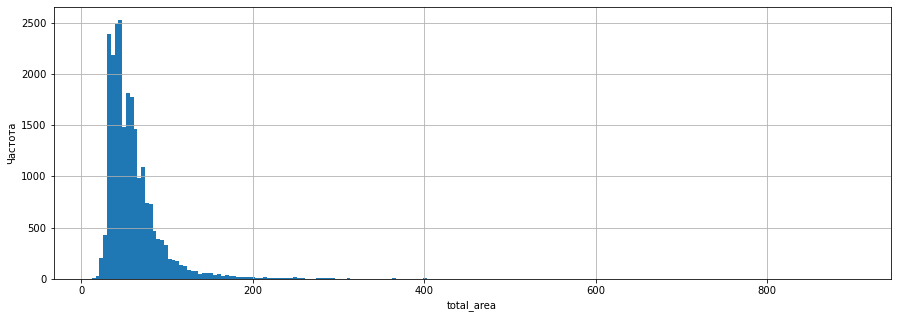

25-й процентиль: 40.0
75-й процентиль: 69.9
Медиана:  52.0
Среднее:  60.348650997932225
Нижний ус: 12.0
Верхний ус: 114.6


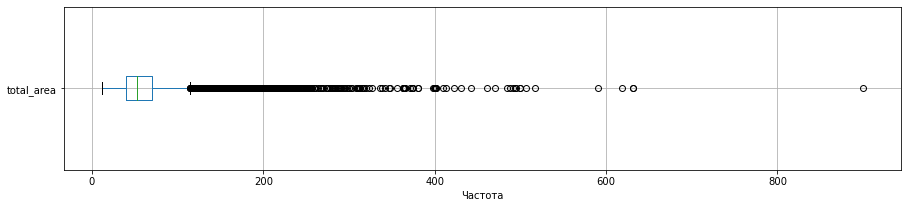

In [36]:
hist_boxplot('total_area')

Гистограмма площади объектов имеет пуассоновское распределение.
<br>После 200 м2 объектов почти нет, поэтому для дальнейшей работы можно обрехать все, что больше этого значения.

In [37]:
print(df.query('total_area > 200')['total_area'].count())
print(df.query('total_area > 200')['total_area'].count() / df.shape[0])

227
0.009578463226296468


227 строк или менее 1% данных будет отрезано, что приемлемо для дальнейшего исследования.

Text(0, 0.5, 'Количество объектов')

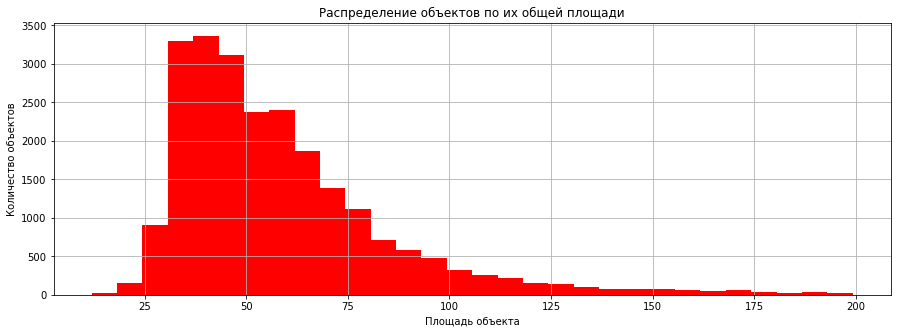

In [38]:
df = df.query('total_area < 200')

df_hist = df['total_area'].plot(
    kind='hist',
    bins=30,
    figsize=(15, 5),
    grid=True,
    color='red',
    title='Распределение объектов по их общей площади')

df_hist.set_xlabel('Площадь объекта')
df_hist.set_ylabel('Количество объектов')

In [39]:
df['total_area'].describe()

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

Основная масса приходится на кваритиры 40-68 м2.

#### 3.1.2  Исследование распределения цены объектов

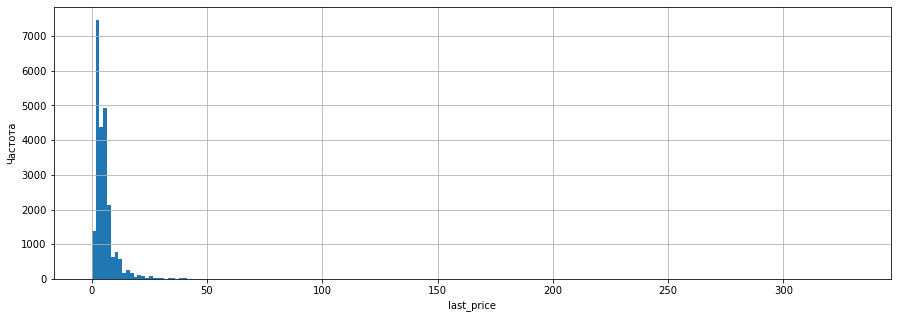

25-й процентиль: 3.0
75-й процентиль: 6.0
Медиана:  4.0
Среднее:  5.532171467530254
Нижний ус: 0
Верхний ус: 10


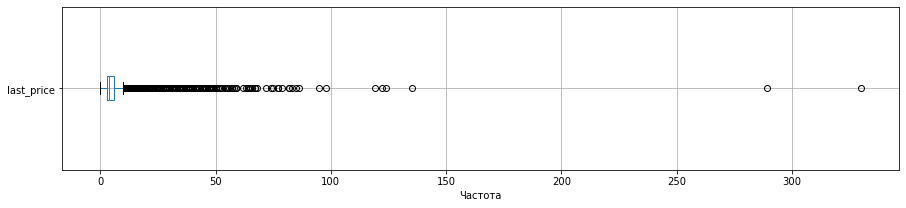

In [40]:
hist_boxplot('last_price')

Пуассоновское распределение. Очень больше расстояние между вбросами. Очевидная линия отсечки - 100 тыс. руб.

In [41]:
print(df.query('last_price > 100')['last_price'].count())
print(df.query('last_price > 100')['last_price'].count() / df.shape[0])

6
0.0002556672916311573


6 строк или менее 1% данных будет отрезано, что приемлемо для дальнейшего исследования.

Text(0, 0.5, 'Количество объектов')

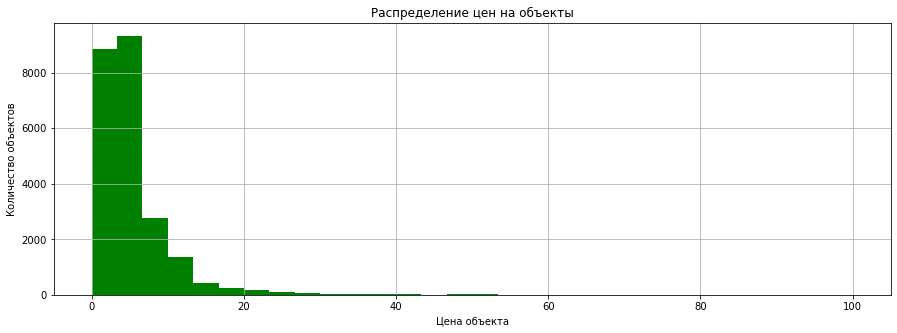

In [42]:
df = df.query('last_price < 100')

df_hist = df['last_price'].plot(
    kind='hist',
    grid=True,
    title='Распределение цен на объекты',
    bins=30,
    figsize=(15, 5),
    color='green',
    range=(0, 100))

df_hist.set_xlabel('Цена объекта')
df_hist.set_ylabel('Количество объектов')

In [43]:
df['last_price'].describe()

count    23462.000000
mean         5.485892
std          5.359028
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         98.000000
Name: last_price, dtype: float64

Стоимость большинства объектов (75-й процентиль) не превышает 6 млн. руб., что очень блико к среднему значению.

#### 3.1.3  Исследование распределения числа комнат объектов

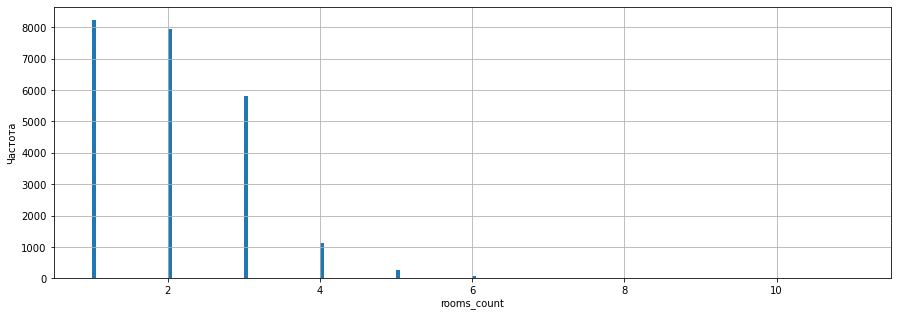

25-й процентиль: 1.0
75-й процентиль: 3.0
Медиана:  2.0
Среднее:  2.0423663796777767
Нижний ус: 1
Верхний ус: 6


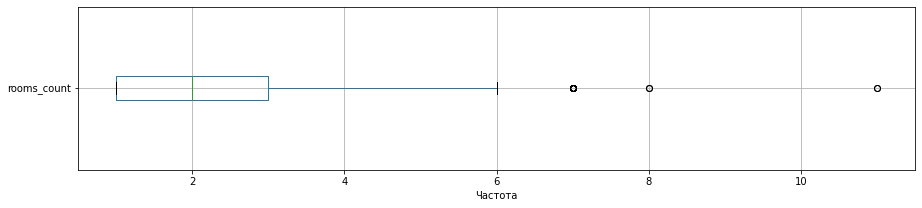

In [44]:
hist_boxplot('rooms_count')

Поскольку варианты значений данного параметра не так многообразны как у предыдущих, вбросов мало. Можно ограничиться данными с числом комнат менее или равным 6.

In [45]:
print(df.query('rooms_count > 7')['rooms_count'].count())
print(df.query('rooms_count > 7')['rooms_count'].count() / df.shape[0])

4
0.00017048844940755265


4 строки или менее 1% данных будет отрезано, что приемлемо для дальнейшего исследования.

Text(0, 0.5, 'Количество объектов')

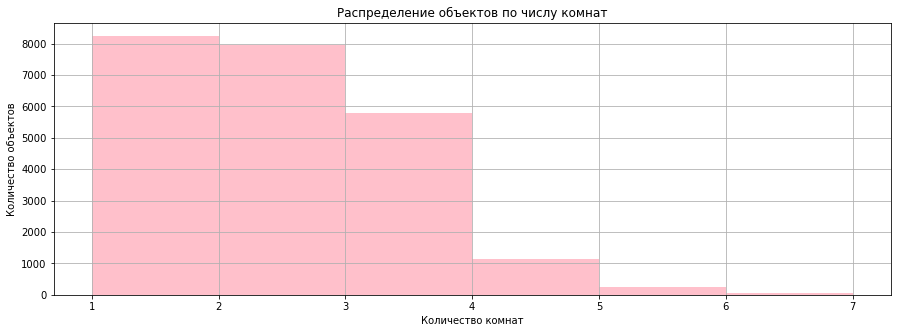

In [46]:
df = df.query('rooms_count < 7')

df_hist = df['rooms_count'].plot(
    kind='hist',
    bins=6,
    range=(1, 7),
    grid=True,
    figsize=(15, 5),
    color='pink',
    title='Распределение объектов по числу комнат')

df_hist.set_xlabel('Количество комнат')
df_hist.set_ylabel('Количество объектов')

In [47]:
df['rooms_count'].describe()

count    23438.000000
mean         2.036863
std          0.966966
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms_count, dtype: float64

Большая часть объектов имеют 1-2 комнаты, далее идет значительный спад, увеличивайся примерно в три раза с каждой инкрементальной комнатой.

#### 3.1.4  Исследование распределения высоты потолка объекто

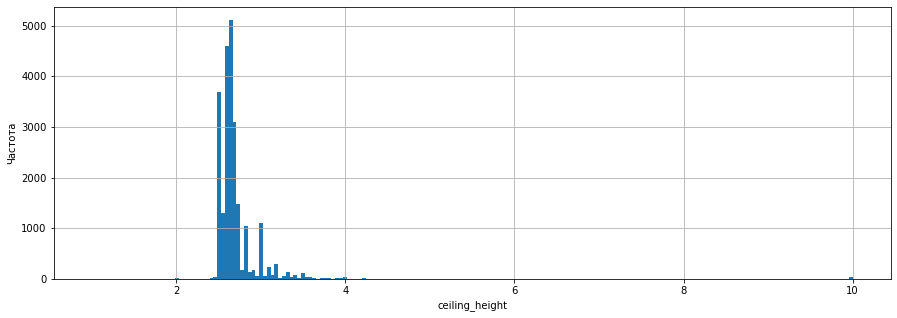

25-й процентиль: 2.6
75-й процентиль: 2.7
Медиана:  2.65
Среднее:  2.700208208891489
Нижний ус: 2.45
Верхний ус: 2.85


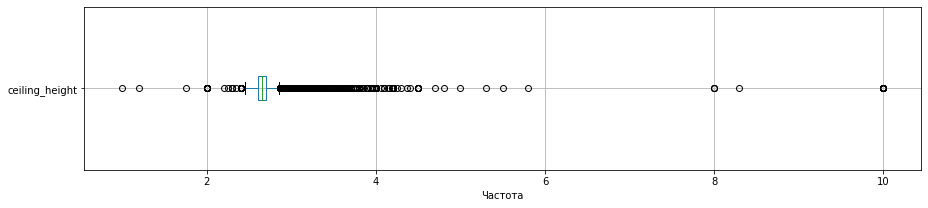

In [48]:
hist_boxplot('ceiling_height')

Пуассоновское распределение. Большинство объектов находится в диапазоне 2.5 - 5 м. Проведем отсечку 2.5-5 м.

In [49]:
print(df.query('ceiling_height < 2.5')['ceiling_height'].count() + df.query('ceiling_height > 5')['ceiling_height'].count())
print((df.query('ceiling_height < 2.5')['ceiling_height'].count() + df.query('ceiling_height > 5')['ceiling_height'].count()) / df.shape[0])

109
0.004650567454560969


109 строк или менее 1% данных будет отрезано, что приемлемо для дальнейшего исследования.

Text(0, 0.5, 'Количество объектов')

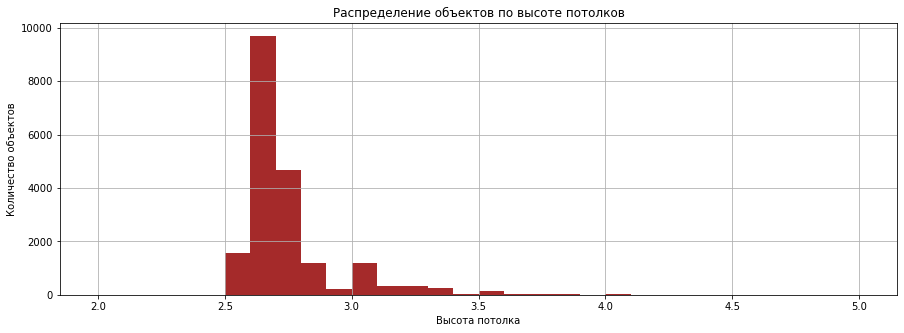

In [50]:
df = df.query('2.5 < ceiling_height < 5')

df_hist = df['ceiling_height'].plot(
    kind='hist',
    bins=30,
    range=(2, 5),
    grid=True,
    figsize=(15, 5),
    color='brown',
    title='Распределение объектов по высоте потолков')

df_hist.set_xlabel('Высота потолка')
df_hist.set_ylabel('Количество объектов')

In [51]:
df['ceiling_height'].describe()

count    19816.000000
mean         2.724820
std          0.206489
min          2.510000
25%          2.600000
50%          2.650000
75%          2.750000
max          4.800000
Name: ceiling_height, dtype: float64

Среднее значение 2.7 м, что очень близко к медианнтому 2.65.

### 3.2  Исследование времени продажи объекта

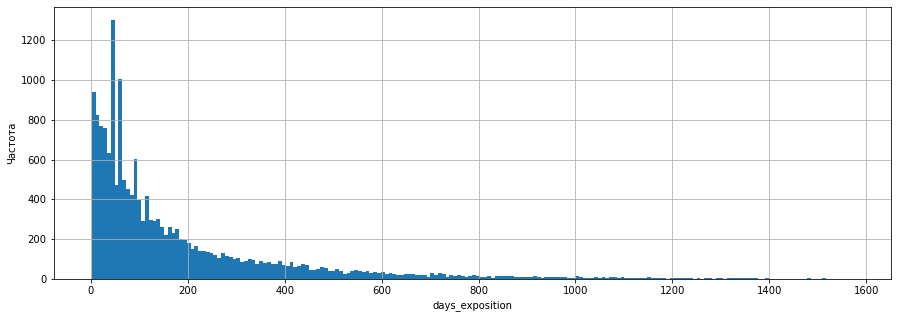

25-й процентиль: 45.00000000000001
75-й процентиль: 234.0
Медиана:  96.0
Среднее:  182.29608487574237
Нижний ус: 2.0
Верхний ус: 517.0


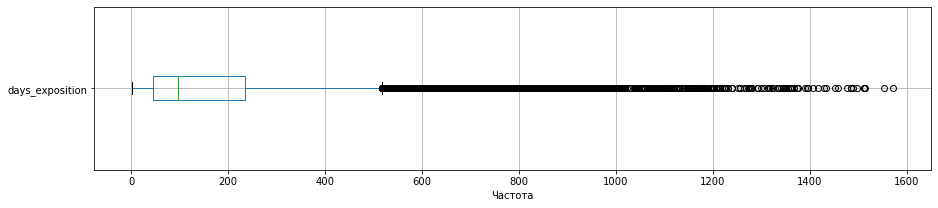

In [52]:
hist_boxplot('days_exposition')

На "ящике с усами" примерно после 1250 дней в распределении значений появляется больше разрывов. В качестве отсечки примем 1250 дней. Выберем только строки, меньше данной отчечки.

In [53]:
print(df.query('days_exposition > 1250')['days_exposition'].count())
print(df.query('days_exposition > 1250')['days_exposition'].count() / df.shape[0])

60
0.0030278562777553493


60 строк или менее 1% данных будет отрезано, что приемлемо для дальнейшего исследования.

In [54]:
df = df.query('days_exposition < 1250')

Text(0, 0.5, 'Количество объектов')

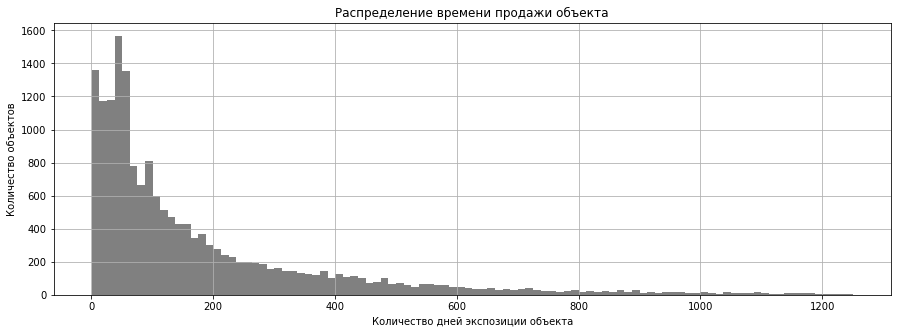

In [55]:
df_hist = df['days_exposition'].plot(
    kind='hist',
    bins=100,
    range=(1, 1250),
    grid=True,
    figsize=(15, 5),
    color='grey',
    title='Распределение времени продажи объекта')

df_hist.set_xlabel('Количество дней экспозиции объекта')
df_hist.set_ylabel('Количество объектов')

In [56]:
print((df['days_exposition'].quantile(0.25) / 30).round(0))
print((df['days_exposition'].quantile(0.5) / 30).round(0))
print((df['days_exposition'].quantile(0.75) / 30).round(0))

2.0
3.0
8.0


Большинство типичных квартир продаются в течение 2-3 месяцев. Половина объектов реализуется в течение 3 месяцев.

* "Быстрая продажа" - менее 2 месяцев.
* "Долгая продажа" - более 8 месяцев.

### 3.3. Исследование факторов, влияющих на стоимость квартиры

#### 3.3.1  Зависимость цены общей площади, числа комнат и удаленности от центра города

In [57]:
corr = df[["total_area","rooms_count", 'city_center_distance','last_price']].corr()
corr

,total_area,rooms_count,city_center_distance,last_price
total_area,1.000000,0.802324,-0.236431,0.722314
rooms_count,0.802324,1.000000,-0.183245,0.444652
city_center_distance,-0.236431,-0.183245,1.000000,-0.305149
last_price,0.722314,0.444652,-0.305149,1.000000


Построим матрицу рассеяния, чтобы определить зависимости между характеристиками квартиры.

array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms_count'>],
       [<AxesSubplot:xlabel='total_area', ylabel='city_center_distance'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='city_center_distance'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='city_center_distance'>,
        <AxesSubplot:xlabel='last_price', ylabel='city_center_distance'>],
       [<AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='last_price'>,
        <AxesSubplot:xl

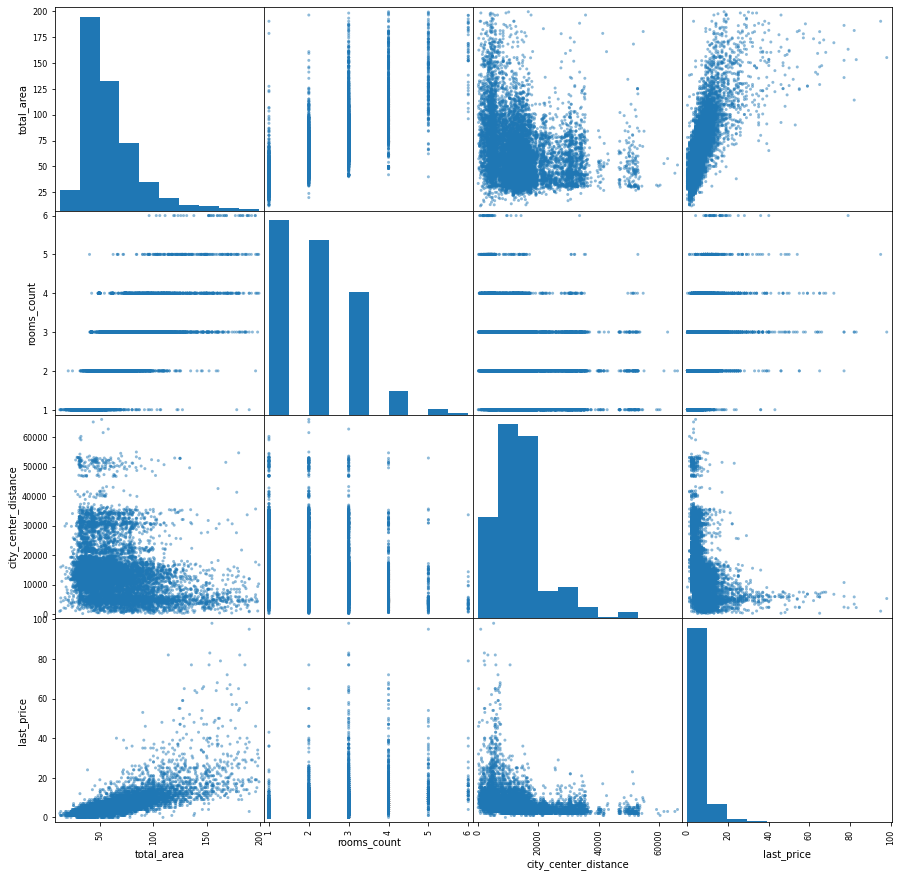

In [58]:
pd.plotting.scatter_matrix(df[["total_area","rooms_count", 'city_center_distance','last_price']],figsize=(15,15))

Наблюдается снижение цены с ростом удаленности от центра, а также прямая зависимость от площади объекта.

#### 3.3.2  Зависимость цены от этажа

Text(0.5, 0, 'Этаж')

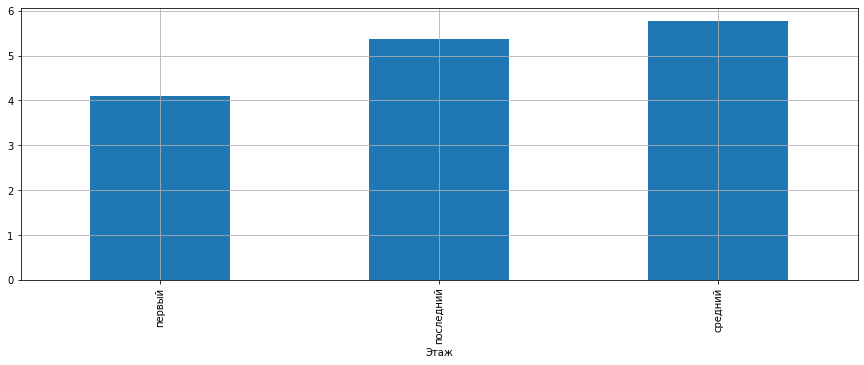

In [59]:
floor_group_pivot = df.pivot_table(index='floor_group', values='last_price', aggfunc='mean')

floor_group_pivot_plot = floor_group_pivot.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    legend=False)

floor_group_pivot_plot.set_xlabel('Этаж')

Наиболее дорогие квартиры находятся на средних этажах, намиболее дешевые - на первом.

#### 3.3.3  Зависимость цены от даты размещения объявления

In [60]:
corr = df[['dow_exposition', 'month_exposition', 'year_exposition', 'last_price']].corr()
corr

,dow_exposition,month_exposition,year_exposition,last_price
dow_exposition,1.000000,0.021288,0.005481,-0.006723
month_exposition,0.021288,1.000000,-0.191732,0.008228
year_exposition,0.005481,-0.191732,1.000000,-0.061465
last_price,-0.006723,0.008228,-0.061465,1.000000


Корреляция между днем недели/месяцем/годом размещения объявления и ценой отсуствует.

#### 3.3.4  Зависимость цены от населенного пункта

In [61]:
# Стоимость м2 по населенным пунктам.

df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

top_ten_locations = df.groupby('locality_name').agg({'locality_name': 'count', 'price_per_meter':'mean'})
top_ten_locations.columns = ['cnt', 'avg_rub']
top_ten_locations = round(top_ten_locations.sort_values(by='cnt', ascending=False), 0).head(10)

cheap = top_ten_locations.query('avg_rub == avg_rub.min()')
expensive = top_ten_locations.query('avg_rub == avg_rub.max()')
top_ten_locations

,cnt,avg_rub
locality_name,,
Санкт-Петербург,11601,103.0
поселок Мурино,541,73.0
поселок Шушары,381,68.0
Всеволожск,311,59.0
деревня Кудрово,298,81.0
поселок Парголово,287,79.0
Пушкин,233,95.0
Колпино,214,64.0
Гатчина,209,58.0


In [62]:
# Локация с максимальной средней стоимостью м2.

top_ten_locations.query('avg_rub == avg_rub.max()')

,cnt,avg_rub
locality_name,,
Санкт-Петербург,11601,103.0


In [63]:
# Локация с минимальной средней стоимостью м2.

top_ten_locations.query('avg_rub == avg_rub.min()')

,cnt,avg_rub
locality_name,,
Выборг,172,48.0


Text(0, 0.5, 'Населенный пункт')

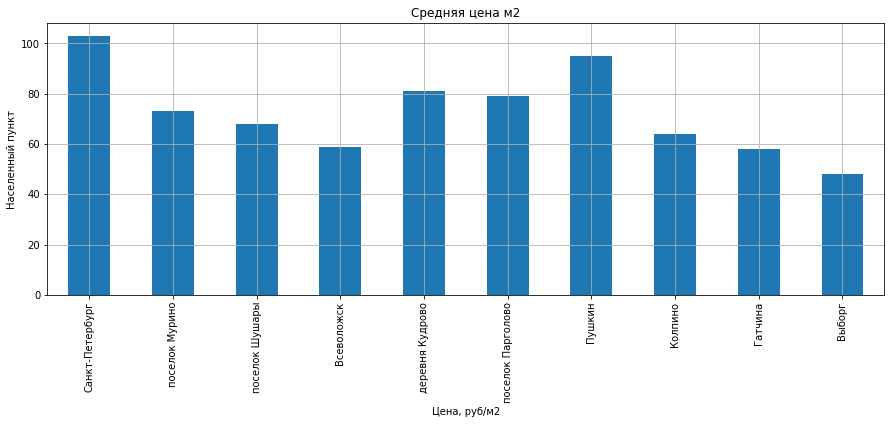

In [64]:
top_ten_locations_plot = top_ten_locations['avg_rub'].plot(
    kind='bar',
    title='Средняя цена м2',
    grid=True,
    figsize=(15, 5)
    )

top_ten_locations_plot.set_xlabel('Цена, руб/м2')
top_ten_locations_plot.set_ylabel('Населенный пункт')

#### 3.3.5  Анализ объектов в Санкт-Петербурге

Проанализируем влияние удаленности квартиры в СПб от центра города на ее цену и определим центр города.

Text(0, 0.5, 'Цена, руб/м2')

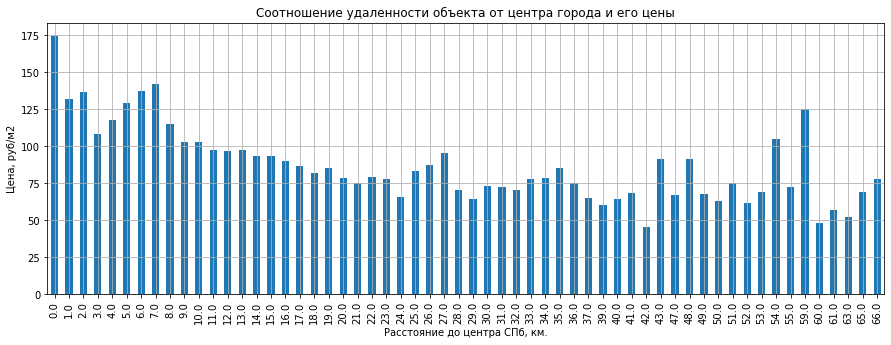

In [65]:
df['city_center_distance_km'] = round(df['city_center_distance'] / 1000, 0)

spb = df.query('locality_name == "Санкт-Петербург"')
spb_avg_price_by_km = df.groupby('city_center_distance_km').agg({'price_per_meter':'mean'})


spb_avg_price_by_km_hist = spb_avg_price_by_km.plot(
    kind='bar',
    legend=False,
    figsize=(15, 5),
    grid=True,
    title='Соотношение удаленности объекта от центра города и его цены')

spb_avg_price_by_km_hist.set_xlabel('Расстояние до центра СПб, км.')
spb_avg_price_by_km_hist.set_ylabel('Цена, руб/м2')

Вероятно, центром города является граница до 8 км, т.к. далее начинается заметное снижение цены.

In [66]:
spb_city_center = spb.query('city_center_distance_km < 8')

spb_city_center['last_price'].describe()

count    2668.000000
mean       10.916042
std         9.590201
min         1.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        98.000000
Name: last_price, dtype: float64

In [67]:
spb_city_center['price_per_meter'].describe()

count    2668.000000
mean      128.730135
std        64.464125
min         9.000000
25%        91.000000
50%       113.000000
75%       143.000000
max       719.000000
Name: price_per_meter, dtype: float64

Медианная стоимость квартиры в центре СПб составляет 8 млн. руб. (против 4 млн. руб. в среднем по базе СПб и ЛО) или 113 тыс. руб. за м2 (против 85 тыс. руб.)

<b>Рассмотрим площади квартир в центре СПб.</b>

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

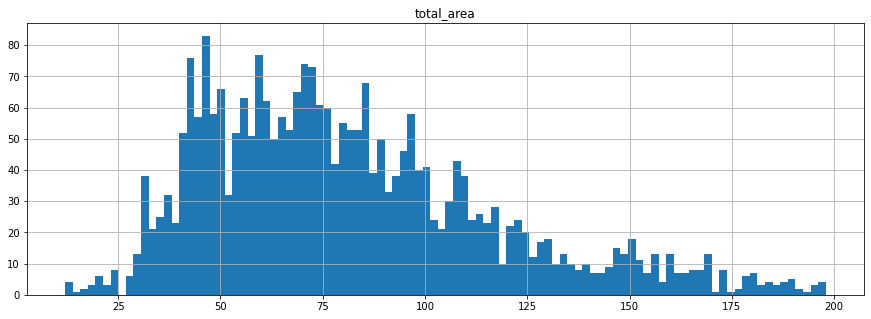

In [68]:
spb_city_center.hist(
    column = 'total_area',
    bins=100,
    figsize=(15,5)
)

In [69]:
spb_city_center['total_area'].describe()

count    2668.000000
mean       81.454816
std        35.313415
min        12.000000
25%        55.000000
50%        75.000000
75%       100.000000
max       198.000000
Name: total_area, dtype: float64

Больштнство объектов в центе СПб имеют площадь 30-75 м2., достаточно высока доля квартир площадью более 100 м2. Медиана также выокая: 75 м2.

<b>Рассмотрим число комнат квартир в центре города.</b>

array([[<AxesSubplot:title={'center':'rooms_count'}>]], dtype=object)

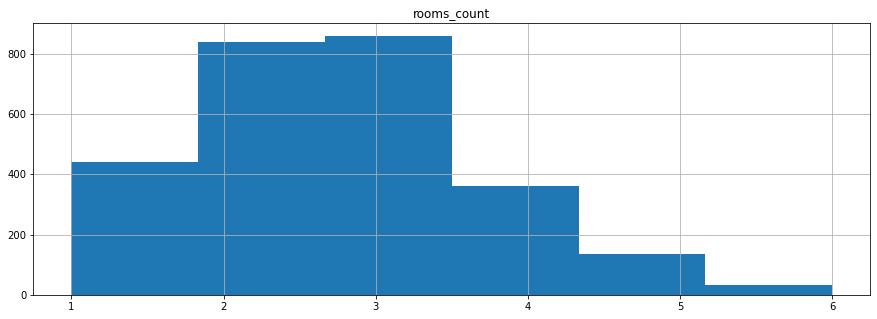

In [70]:
spb_city_center.hist(column = 'rooms_count',
                     bins=spb_city_center['rooms_count'].max(),
                     figsize=(15,5)
                    )

In [71]:
spb_city_center['rooms_count'].describe()

count    2668.000000
mean        2.628186
std         1.133920
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: rooms_count, dtype: float64

Большинство квартир в центре СПб имеют 2-3 комнаты. Половина квартир - 3 комнаты.

<b>Рассмотрим высоту потолков квартир в центре города.</b>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

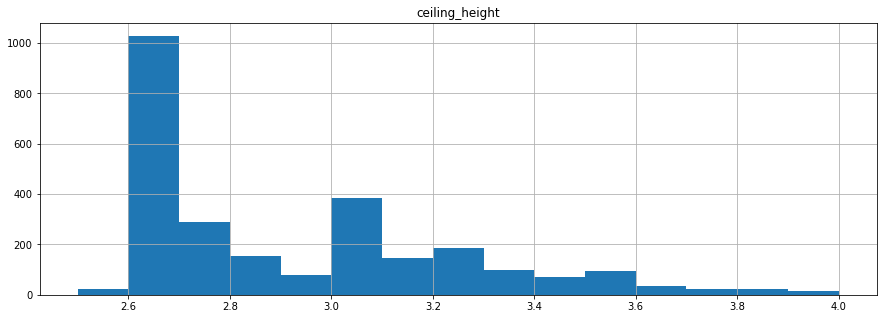

In [72]:
spb_city_center.hist(column = 'ceiling_height',
                     bins=15,
                     range=(2.5,4),
                     figsize=(15,5)
                    )

In [73]:
spb_city_center['ceiling_height'].describe()

count    2668.000000
mean        2.908508
std         0.330573
min         2.510000
25%         2.650000
50%         2.765000
75%         3.100000
max         4.800000
Name: ceiling_height, dtype: float64

Большинство объектов в центре СПб имеют высоту потолков 2.7 м.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='last_price'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='rooms_count'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='floor'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='floor'>],
       [<AxesSubplot:xla

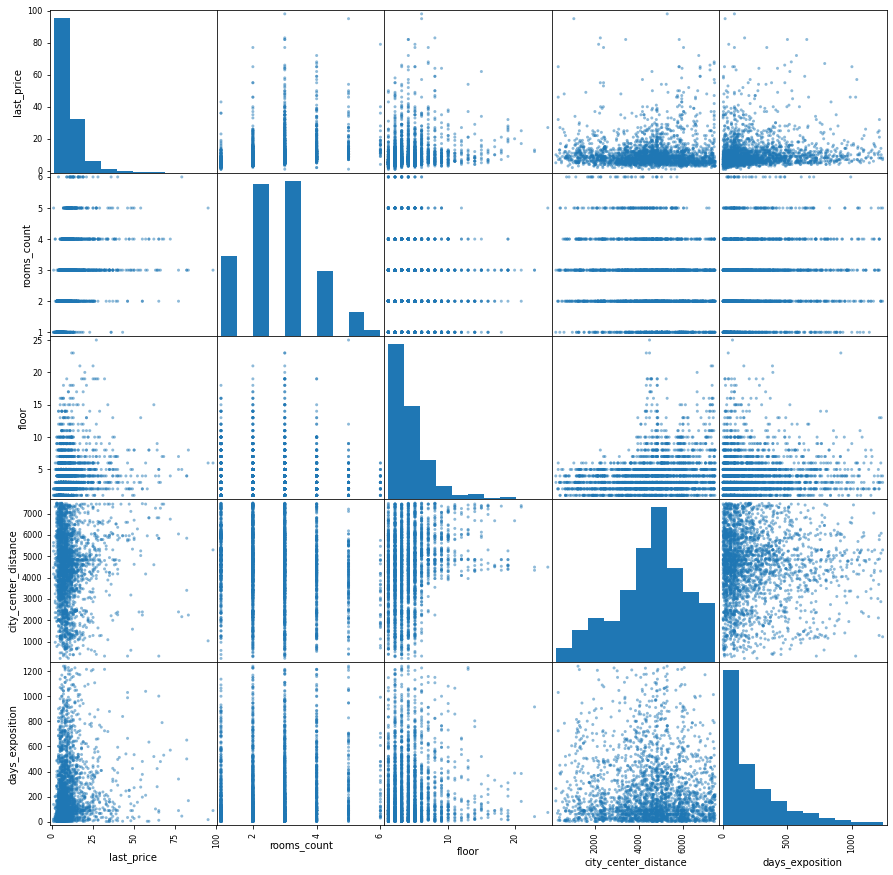

In [74]:
pd.plotting.scatter_matrix(spb_city_center[['last_price', 'rooms_count', 'floor', 'city_center_distance', 'days_exposition']],figsize=(15,15))

Из матрицы диаграмм рассеяния можно сделать следующие выводы об объектах в центре СПб:
* Чем ближе к центру - тем выше цена. 
* Чем вышу цена - тем медленней продается объект.
* В 4 км от центра нет квартир выше 10 этажа.
* Средние (3-4) этажи, как правило, самые дорогие.

Сравним это с данными по всей базе недвижимости СПб и ЛО.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='last_price'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='rooms_count'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='rooms_count'>],
       [<AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms_count', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='city_center_distance', ylabel='floor'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='floor'>],
       [<AxesSubplot:xla

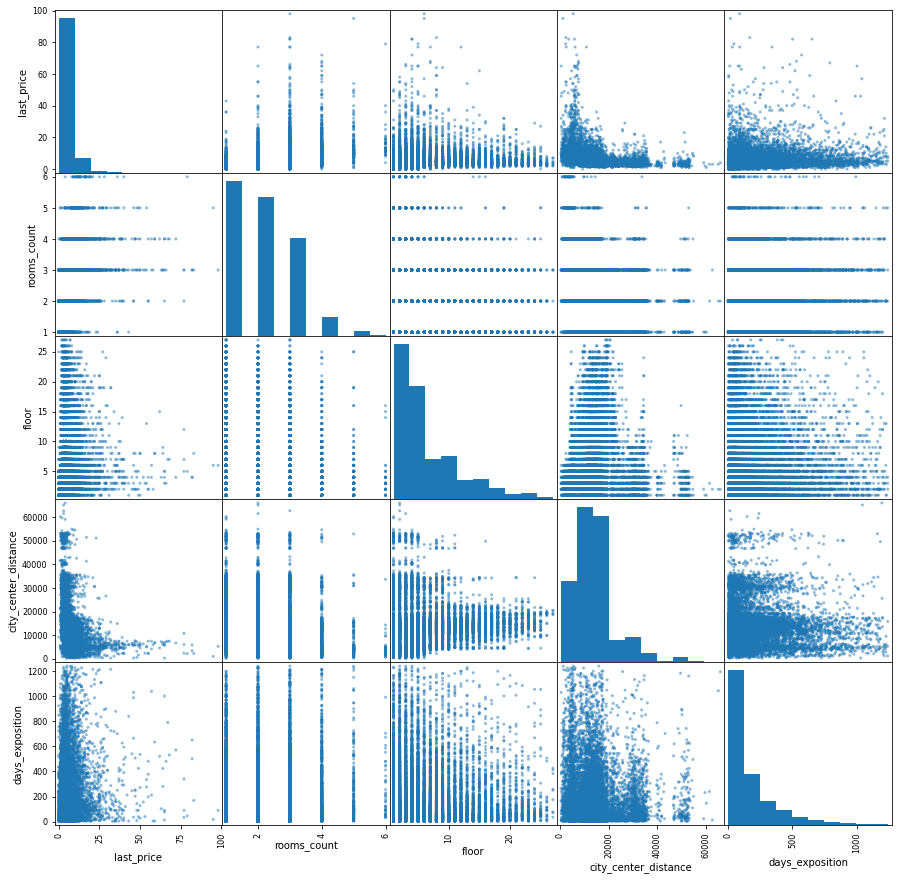

In [75]:
pd.plotting.scatter_matrix(df[['last_price', 'rooms_count', 'floor', 'city_center_distance', 'days_exposition']],figsize=(15,15))

Корреляции цены всей базе недвижимости СПб и ЛО не отличаются от аналогчиных зависимостей центра СПб.

## 4. Итоги исследования

В процессе исследования была осуществена проверка датасета, в том числе на наличие пропусков и дубликатов. Наиболее важные для целей исследования пропуски данных были заполнены (например, на основании типичной площади в группе объектов той же этажности).
Были выделены факторы, наиболее сильно влияющие на цену квартиры, для таких параметров были опрделены и удалены экстримальные значения (вбросы).
Типичная квартира в СПб и ЛО, представленная в базе, следующая: двухкомнатная, с потолками 2.7 м, общей площадью 51.9 м2, стоимостью около 4 млн. руб. (85 тыс. руб. за м2).
Квартиры в центре СПб (радиус до 8 км), в большинстве случаев 3-х комнатные, с потолками 2.77 м, общей площадью 75 м2. и стомостью 8 млн. руб., (113 тыс. руб. за м2).

* На цену объекта влияет его ощая площадь и удаленность от центра.
* 75% объектов продаются в срок до 3 месяцев.
* Наиболее дорогие квартиры располагаются на верхних этажах.
* Наибольшая цена м2 в Санкт-Петербуре и Пушкине.